# Homework 06
## Brown University
## DATA 1010
## Fall 2020

In [ ]:
using Plots, Distributions

## Problem 1

Label each of the following four estimators as either (i) biased and
  consistent, (ii) biased and inconsistent, (iii) unbiased and
  consistent, or (iv) unbiased and inconsistent.  The matching will be
  one-to-one.

(a) $X_1, X_2, \ldots$ are i.i.d. Bernoulli random variables with
    unknown $p$ and estimator 
    $$\widehat{p} = \frac{1}{n}\sum^n_{i=1}X_i$$

(b) $X_1, X_2, \ldots$ are i.i.d. $\mathcal{N}(\mu,\sigma^2)$, with
    unknown $\mu$ and $\sigma^2$ and estimator 
    $$\widehat{\sigma}^2 = \frac{\displaystyle{\sum^n_{i=1}(X_i-\bar{X})^2}}{n}$$

(c) $X_1, X_2, \ldots$ are i.i.d. uniform random variables on an
    unknown bounded interval. For $n\geq 100$ we estimate the
    mean using
    $$\widehat{\mu} = \frac{\displaystyle{\sum^{100}_{i=1}X_i}}{100}$$
    
(d) $X_1, X_2, \ldots$ are i.i.d. $\mathcal{N}(\mu,\sigma^2)$, with
    unknown $\mu$ and $\sigma^2$. For $n\geq 100$ we estimate the
    standard deviation using
    $$\widehat{\sigma} = \sqrt{\frac{\displaystyle{\sum^{100}_{i=1}(X_i-\overline{X})^2}}{99}}$$

*Solution*.  
(a) **Unbiased and consistent**. The expectation of
    $\widehat{p}$ is $(1/n)(np) = p$, and the variance converges to 0
    since $\widehat{p}$ is an average of i.i.d., finite-variance
    random variables. Therefore, the mean squared error converges to 0
    as $n\to\infty$
    
    
(b) **Biased and consistent**. The estimator is biased
    because its value is always slightly smaller than the unbiased
    estimator (which has $n-1$ instead of $n$ in the denominator). The
    estimator is nevertheless consistent, since the bias and the
    variance both converge to 0 as $n\to\infty$.

  
(c) **Unbiased and inconsistent**. The mean of $\widehat{\mu}$
    is $(1/100)(100 \mu) = \mu$, so the estimator is unbiased. The
    variance isn't zero and doesn't depend on $n$, so it cannot
    converge to 0 as $n\to\infty$. Therefore, the estimator is
    inconsistent.
    
    
(d) **Biased and inconsistent**. This estimator is
    inconsistent for the same reason as (c). The bias is trickier. Since
    the variance of $\widehat{\sigma}$ is positive, then we have
    $\mathbb{E}[\hat{\sigma}^2]  -\mathbb{E}[\hat{\sigma}]^2 >0$, which implies that 
    $$\mathbb{E}[\hat{\sigma}]^2<\mathbb{E}[\hat{\sigma}^2] = \mathbb{E}\left[\frac{1}{99}\sum_{i=1}^{100}(X_i-\overline{X})^2\right]=\sigma^2$$
    
Thus the bias of $\widehat{\sigma}$ is negative.

## Problem 2

There's nothing particularly special about the normal approximation when it comes to producing confidence intervals. We can use any relevant results from mathematical probability to come up with a confidence interval. In this problem, we're going to explore several such options for the same example of $n$ Bernoulli($p$) random variables. 

(a) **Hoeffding's inequality** says that if $Y_1, Y_2, \ldots$ are independent random variables with the property that $\mathbb{E}[Y_i] = 0$ and $a_i \leq Y_i \leq b_i$ for all $i$, then for all $\epsilon>0$ and $t > 0$, we have $$\mathbb{P}\left(Y_1 + Y_2 + \cdots + Y_n \geq \epsilon \right) \leq e^{-t \epsilon} \prod_{i=1}^n e^{t^2(b_i-a_i)^2/8}.$$
    
Use Hoeffding's inequality to show that if $X_1, X_2, X_3, \ldots$ is a sequence of independent $\operatorname{Bernoulli}(p)$ random variables, then for all $\alpha > 0$, the interval $\left(\overline{X}_n - \sqrt{\frac{1}{2n}\log(2/\alpha)},\overline{X}_n + \sqrt{\frac{1}{2n}\log(2/\alpha)}\right)$ is a confidence interval for $p$ with confidence level $1 - \alpha$. Explain what happens to the width of this confidence interval if $n$ gets large, and also what happens to the width if $\alpha$ is made very small.
    
(b) As above, consider $n$ independent $\operatorname{Bernoulli}(p)$'s. Find the normal-approximation confidence interval for $p$

(c) As above, consider $n$ independent $\operatorname{Bernoulli}(p)$'s. Find the Chebyshev confidence interval for $p$. (Chebyshev's inequality says that the probability of any random variable deviating from its mean by more than $k$ standard deviations is no more than $1/k^2$.)

(d) Find the numerical values of the half-widths for each of the above confidence intervals when $p = \frac{1}{2}$, $n = 1000$, and $\alpha = 0.05$ (approximating $\overline{X}$ as $p$). 

*Solution*.  
(a) Let's define $Y_i = (X_i - p)/n$. Then $\mathbb{E}[Y_i] = 0$, and the
    the tightest interval $[a_i,b_i]$ that contains the range of $Y_i$
    is $[-p/n,(1-p)/n]$. So Hoeffding's inequality says that
    $$\mathbb{P}(\overline{X}_n - p \geq \epsilon) \leq
      e^{-t\epsilon+nt^2/(8n^2)}.$$
   Since this inequality holds for all $t$, we achieve the best upper
    bound by choosing the value of $t$ which minimizes the exponent on
    the right-hand side. Since the graph of that expression is a
    convex parabola, we can find the minimum of the expression by
    differentiating and finding the unique critical point. We find
    that the minimizing value of $t$ is $4\epsilon/n$, which means
    that
    $$\mathbb{P}(\overline{X}_n - p \geq \epsilon) \leq e^{-2n\epsilon^2}.$$
   
   Substituting $\epsilon_n = \sqrt{\frac{1}{2n}\log(2/\alpha)}$, we
    get $\mathbb{P}(\overline{X}_n - p \geq \epsilon_n) \leq
    \alpha/2$. Likewise, we can repeat all of the above for
    $Y_i = -(X_i - p)/n$ and find that
    $\mathbb{P}(\overline{X}_n - p \leq -\epsilon_n) \leq \alpha/2$. So the
    probability that $|\overline{X}_n - p| \geq \epsilon_n$ is no more
    than $\frac{\alpha}{2} + \frac{\alpha}{2} = \alpha$ (by
    the subadditivity property of probability measures).

   As $n\to\infty$, the confidence interval shrinks, and if $\alpha$
    is very small, then the confidence interval grows. Both of these
    are consistent with what you would expect: more data permits a
    tighter confidence interval, and a higher confidence level
    requires a wider confidence interval.

(b) The normal-approximation confidence interval is
$(\overline{X}_n - z_{\alpha/2}\sqrt{\overline{X}_n 
(1-\overline{X}_n)/n}, \overline{X}_n +
z_{\alpha/2}\sqrt{\overline{X}_n (1-\overline{X}_n)/n})$
    $z_{\alpha/2}$ is the value such that the standard normal
    distribution assigns mass $1-\alpha$ to $[-z_{\alpha/2},
    z_{\alpha/2}]$.

(c) The Chebyshev confidence interval is
    $(\overline{X}_n - \frac{1}{\sqrt{\alpha}}\sqrt{\overline{X}_n
      (1-\overline{X}_n)/n}, \overline{X}_n +
    \frac{1}{\sqrt{\alpha}}\sqrt{\overline{X}_n
      (1-\overline{X}_n)/n})$, where the expression
    $\frac{1}{\sqrt{\alpha}}$ is obtained by solving the equation
    $1/k^2 = \alpha$ for $k$.

(d) We approximate $\overline{X}_n \approx p$ to find the values
    $$\sqrt{\log(2/0.02)/(2\cdot1000)} \approx 0.048
      \quad
      1.96\sqrt{(1/2)(1-1/2)/1000} \approx 0.031
      \quad
      \frac{1}{\sqrt{0.05}}\sqrt{(1/2)(1-1/2)/1000} \approx 0.071$$
   So we can see that the normal approximation provides the tightest
    confidence interval, while Hoeffding does better than Chebyshev.

## Problem 3

The **one-sided** DKW inequality says that 
$$\mathbb{P}\left(\max _{x \in \mathbb{R}}\left(F_{n}(x)-F(x)\right)>\varepsilon\right) \leq e^{-2 n \varepsilon^{2}} \quad \text { for every } \varepsilon \geq \sqrt{\frac{1}{2 n} \ln 2},$$
with the same notation and stipulations of the two-sided DKW inequality.

Repeat the investigation we did in class, but with the one-sided DKW inequality in place of the two-sided version, to see how whether the bound in the theorem is tighter for this version.

*Note: a bound is tight if it holds but not always by a wide margin. For example, if we know that $x \in [0,1]$, then the bound $x \leq 1.1$ is tighter than the bound $x \leq 10$. The tightest possible upper bound would be $x \leq 1$ in this case.*

In [ ]:
using Roots
n = 100
ϵ = find_zero(ϵ -> exp(-2n*ϵ^2) - 0.1, 0.05)
function inband()
  xs = sort(rand(Exponential(1),n))
  all(@. 1 - exp(-xs) + ϵ > (1:n)/n )
end
mean(inband() for _ in 1:10^6)

0.906946

*Solution:*  
Yes, this version is much tighter than the two-sided bound. The event in question occurs with probability about 9.5%, which is much closer to 10% than the two-sided value of 6.5%. This leads us to believe that the one-sided DKW inequality provides more precise probabilistic information about the deviation of the empirical CDF from the CDF of the underlying distribution $\nu$.

## Problem 4

A manufacturer wants to introduce a new patch for infusing a particular hormone into the bloodstream. For FDA approval purposes, they need to demonstrate *bioequivalence*, meaning that the new treatment isn't statistically different from the old one. Each subject in the study receives three treatments placebo, old patch, and new patch. The resulting measurements of the concentration of the hormone in the bloodstream are as follows: 

$$\begin{array}{rrr}
\text{placebo} & \text{old} & \text{new} \\ \hline
9243 & 17649 & 16449 \\
9671 & 12013 & 14614 \\
11792 & 19979 & 17274 \\
13357 & 21816 & 23798 \\
9055 & 13850 & 12560 \\
6290 & 9806 & 10157 \\
12412 & 17208 & 16570 \\
18806 & 29044 & 26325
\end{array}$$

Here's a plot of the old and new treatment data: 

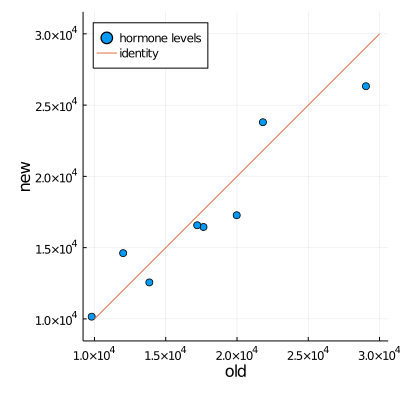

In [ ]:
placebo = [9243, 9671, 11792, 13357, 9055, 6290, 12412, 18806]
old = [17649, 12013, 19979, 21816, 13850, 9806, 17208, 29044]
new = [16449, 14614, 17274, 23798, 12560, 10157, 16570, 26325]
scatter(old, new, xlabel = "old", ylabel="new", label="hormone levels", legend = :topleft, ratio = 1)
plot!([10_000, 30_000], x -> x, label = "identity", size = (400, 400))

The FDA requires that $\theta = |\mathbb{E}[Y]/ \mathbb{E}[Z]| < 0.2$ , where $Y$ is the difference between the old and new treatments, and $Z$ is the difference between the old treatment and placebo.

(a) Find the plug-in estimator $\hat\theta$ from these data. 

(b) Estimate the standard error of $\hat\theta$ by bootstrapping.

(c) Does this study demonstrate bioequivalence to a 95% confidence level?

(d) Do you get different results if you use bootstrap quantile estimates instead of estimating the standard error and using the normal approximation?

*Note: this exercise is due to Efron and Tibshirani.*


The plug-in estimator is 

In [ ]:
θ̂ = mean(new - old) / mean(old - placebo)

-0.07130609590256017

The bootstrap estimate of the standard error works out to about `0.102`, as shown by this little calculation: 

In [ ]:
function bootstrap_θ()
    ind = rand(1:8, 8)
    mean(new[ind] - old[ind]) / mean(old[ind] - placebo[ind])
end

se = std([bootstrap_θ() for _ in 1:1_000_000])

0.1022582915231719

Thus we get a confidence interval of 

In [ ]:
θ̂ - 1.96se, θ̂ + 1.96se

(-0.271534389078339, 0.12892219727321869)

This interval is not contained in $(-0.2, 0.2)$, so this study does not demonstrate bioequivalence.

We get fairly similar results if we estimate quantiles directly:

In [ ]:
quantile([bootstrap_θ() for _ in 1:1_000_000], [0.05, 0.95])

2-element Array{Float64,1}:
 -0.21145538904591754
  0.12120391923347588

## Problem 5

We saw in class that a confidence interval based on bootstrapping can be narrower than is theoretically justified. This can be either because a standard error estimate is smaller than the actual standard deviation of the estimator...

In [ ]:
observations = [9.687, 5.468, 10.882, 16.528, 6.695, 10.459, 14.688, 4.849, 10.697, 10.331, 10.751, 7.656, 12.328, 10.864, 11.499, 12.653, 3.824, 9.129, 13.516, 11.558, 11.551, 15.563, 5.887, 4.984, 14.599, 9.106, 6.617, 17.892, 13.424, 6.565, 15.03, 28.437, 8.846, 11.832, 7.768, 10.634, 7.442, 5.999, 5.317, 10.161, 9.796, 12.406, 5.0, 14.964, 9.458, 17.777, 6.725, 20.72, 2.85, 8.773, 7.215, 11.763, 10.957, 7.315, 11.13, 7.639, 15.01, 9.929, 6.089, 9.181, 7.708, 10.668, 6.81, 3.826, 9.983, 8.628, 17.895, 12.204, 12.935, 11.561, 13.523, 28.834, 16.089, 3.519, 11.164, 8.859, 3.84, 15.213, 4.147, 4.01, 9.578, 6.163, 9.197, 4.823, 12.381, 31.36, 4.531, 6.87, 20.009, 10.89, 13.163, 13.827, 9.219, 18.132, 22.761, 9.659, 6.965, 10.332, 9.938, 4.131];
ν = Chisq(10)
std(median(rand(ν, 100)) for _ in 1:100_000), std(median(rand(observations, 100)) for _ in 1:100_000)

(0.5334277450556509, 0.44723119937939976)

...or because intervals based on bootstrapped quantiles are narrower than the corresponding intervals obtained from the actual distribution of the estimator:

In [ ]:
a = quantile([median(rand(ν, 100)) for _ in 1:100_000], [0.05, 0.95])
b = quantile([median(rand(observations, 100)) for _ in 1:100_000], [0.05, 0.95])
a, b

([8.494101765394463, 10.247497683498038], [9.3385, 10.807500000000001])

In this question, we want to figure out to what extent this conclusion is specific to this particular set of observations (the ones hard-coded as an array literal above)?

(a) Investigate numerically whether the standard error estimate obtained from the bootstrap tends on average to be larger or smaller than the actual standard error value `0.535`.

In other words, repeat the experiment we did above many times, but generate the *original* 100 observations from $\nu$ rather than using the given ones. Figure out the boostrapped standard deviation for each such repetition. Is it less than the correct value `0.535` approximately half the time, or significantly more/less than that?

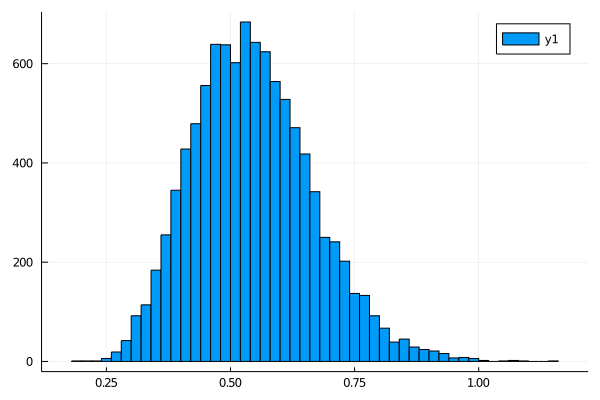

In [ ]:
function bootstrapstd()
    observations = rand(ν, 100)
    std(median(rand(observations, 100)) for _ in 1:1000)
end
estimatedstds = [bootstrapstd() for _ in 1:10_000]
histogram(estimatedstds)

In [ ]:
median(estimatedstds)

0.5371306471781663

It turns out that in this case at least, the confidence interval works out to be approximately correct on average. It's lower than it should be about half the time, and it's higher than it should be about half the time.

(b) Giving a confidence interval which is narrower than the one we would give if we knew the actual standard error of the estimator in question is not necessarily as bad as it seems. The reason is that the bootstrap-calculated standard error is itself random (in the sense that it depends on the observations $X_1, \ldots, X_n)$, and so the diminished probability of the confidence interval trapping the true value of the statistical functional when the bootstrapped standard error works out smaller than the true standard error can be compensated by an increased such probability when the estimated standard error is larger than its true value.

Explore that idea in the context of this particular example. Repeat the following experiment many times: 
1. Sample 100 independent observations from $\nu$. 
2. Produce a 95% confidence interval as $\hat\theta \pm 1.96 \hat{\mathrm{se}}(\hat\theta)$ where $\hat\theta$ is the sample median and $\hat{\mathrm{se}}$ denotes a bootstrap-estimated standard error.
3. Determine whether the estimated confidence interval traps the true value of the statistical functional (which is the median of $\nu$, computable as `quantile(ν, 0.5)`). 

Let's begin by running the described experiment: 

In [ ]:
function test_traps(θ) 
    observations = rand(ν, 100)
    se = std(median(rand(ν, 100)) for _ in 1:10_000)
    θ̂ = median(observations)
    θ̂ - 1.96se < θ < θ̂ + 1.96se
end
θ = quantile(ν, 0.5)

9.341817765591967

In [ ]:
mean([test_traps(θ) for _ in 1:10_000])

0.9515

We see that the confidence interval does actually trap $\theta$ with approximately the desired probability (95%). This suggests that the estimate obtained by bootstrapping is actually a valid confidence interval of the purporported confidence level in this case. 

Nevertheless, some caution is nevertheless warranted in interpreting such confidence intervals. If the interval happens to be especially narrow purely by chance, it would suggest superficially that we were able to determine the value of the statistical functional quite precisely (with high probability). However, the exceptional narrowness of the computed confidence interval makes it *more* likely that the interval fails to trap the actual vaule of the statistical functional.